**Импорт, обработка и изучение данных**

In [73]:
import pandas as pd
import numpy as np
data_train = pd.read_csv(r"C:\A_B_tests\Titanic\train.csv")
data_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [74]:
data_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [75]:
data_train.duplicated().sum()

0

In [76]:
data_train.Cabin.unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [77]:
data_train.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

Данные которые нам необходимы в датасете для нашей бинарной модели представлены ниже. Мы будем заполнять числовые данные средним. А данные категориальные True/False модой.

mode: Destination, HomePlanet, CryoSleep, VIP, Transported


mean: Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

In [78]:
import pandas as pd


columns_to_fill_mode = ['Destination', 'HomePlanet', 'CryoSleep', 'VIP', 'Transported']
columns_to_fill_mean = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
def clean_data(data_mode, data_mean):

    for col in columns_to_fill_mode:
        mode_value = data_train[col].mode()[0]  
        data_train[col] = data_train[col].fillna(mode_value) 


    for col in columns_to_fill_mean:
        mean_value = data_train[col].mean()  
        data_train[col] = data_train[col].fillna(mean_value)  
clean_data(columns_to_fill_mode, columns_to_fill_mean)
data_train.isnull().sum()

C:\Users\rigan\AppData\Local\Temp\ipykernel_3296\436798648.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train[col] = data_train[col].fillna(mode_value)  # Заполняем NaN модой


PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [79]:
data_train = data_train.drop(['Cabin', 'Name'], axis=1)
data_train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

Отображаем данные, почти все числовые столбцы имеют крошечные значения, строим графики и используем логарифмирование для масштабирования данных на графике

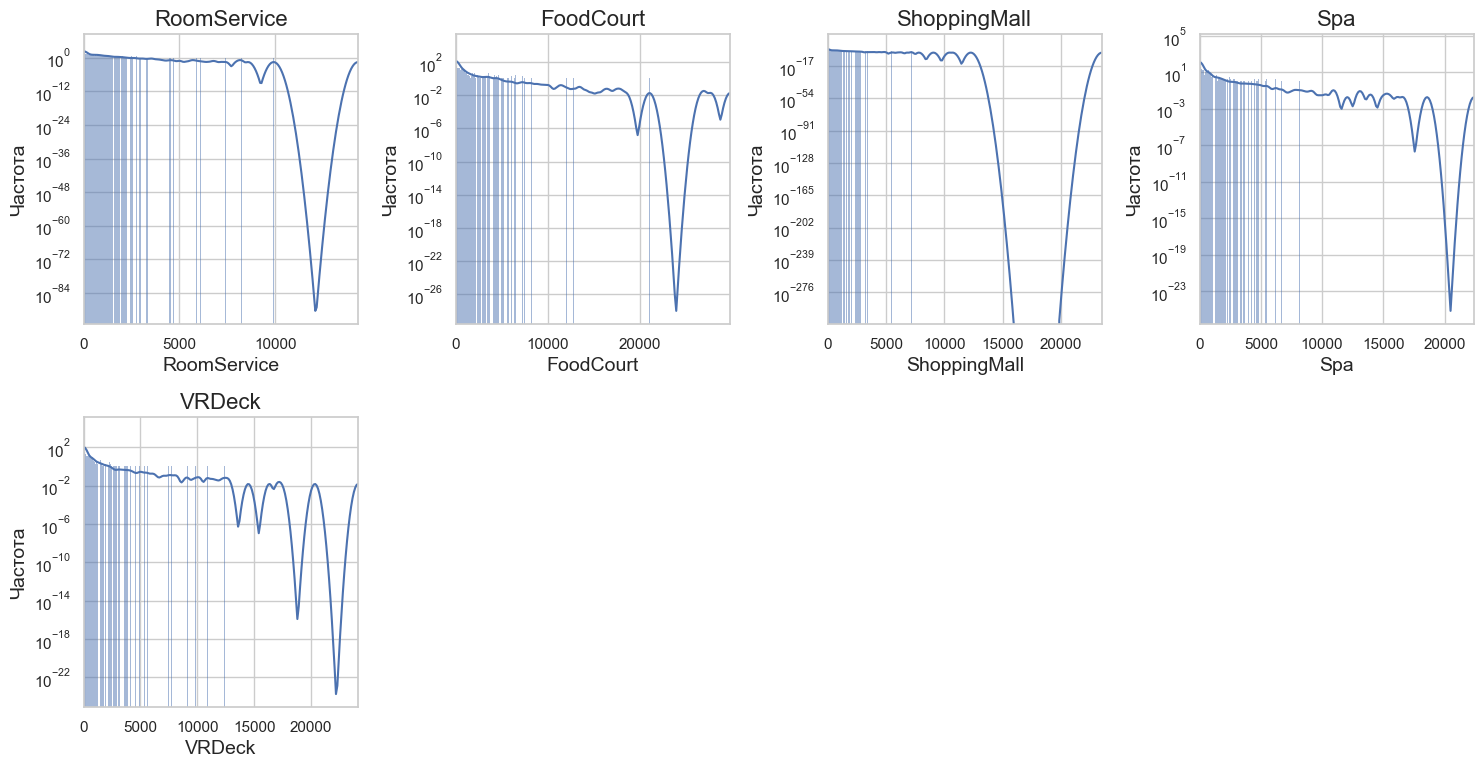

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))


for i, col in enumerate(data_train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].select_dtypes(include='number').columns, 1):
    plt.subplot(4, 4, i) 
    sns.histplot(data_train[col], kde=True) 
    plt.title(col, fontsize=16) 
    plt.xlabel(col, fontsize=14)  
    plt.ylabel('Частота', fontsize=14) 
    

    plt.xlim(data_train[col].min(), data_train[col].max())
    
    plt.yscale('log')  

plt.tight_layout()
plt.show()


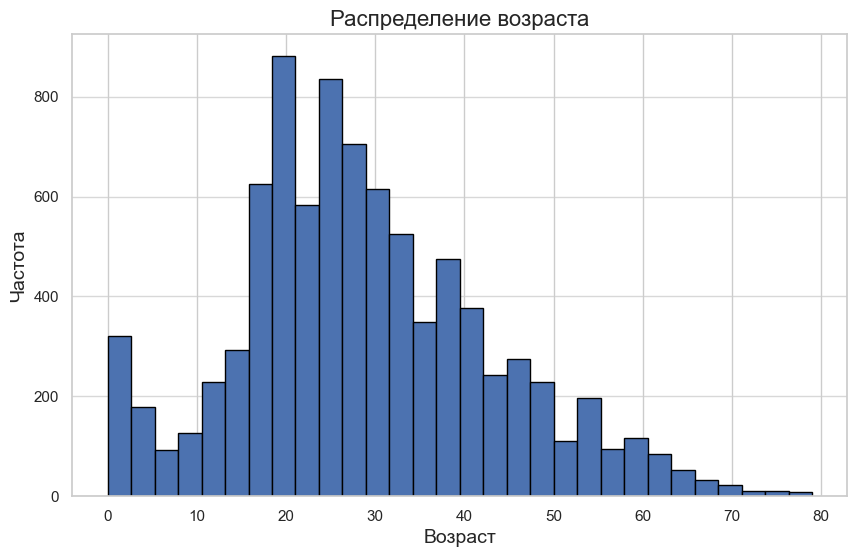

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
data_train['Age'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Распределение возраста', fontsize=16)
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()


C:\Users\rigan\AppData\Local\Temp\ipykernel_3296\2467128785.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_melted, x='Service', y='Amount', palette="vlag")


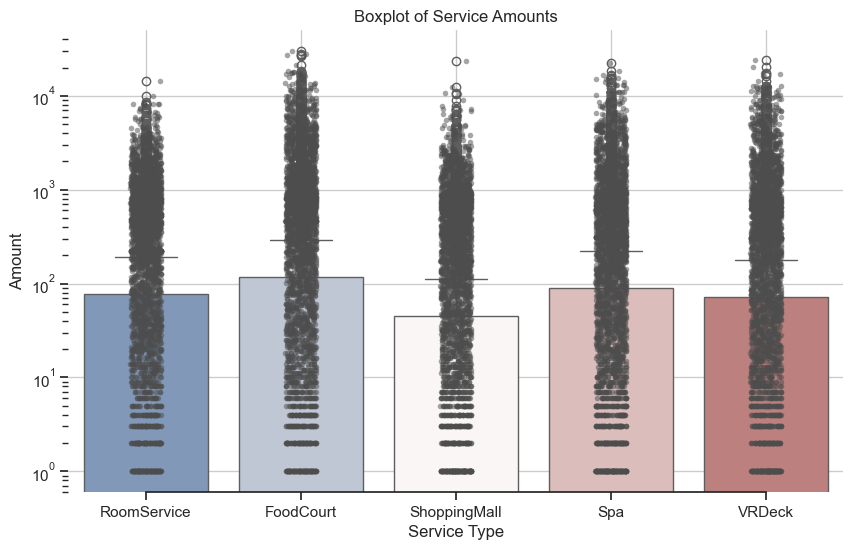

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data_column1 = data_train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

data_melted = data_column1.melt(var_name='Service', value_name='Amount')


sns.set_theme(style="ticks")

# Инициализация фигуры
plt.figure(figsize=(10, 6))


sns.boxplot(data=data_melted, x='Service', y='Amount', palette="vlag")

sns.stripplot(data=data_melted, x='Service', y='Amount', size=4, color=".3", alpha=0.5)


plt.title('Boxplot of Service Amounts')
plt.xlabel('Service Type')
plt.ylabel('Amount')
plt.grid(True)
sns.despine(trim=True, left=True)
plt.yscale('log')


plt.show()


C:\Users\rigan\AppData\Local\Temp\ipykernel_3296\205127612.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data_column2, palette="vlag")


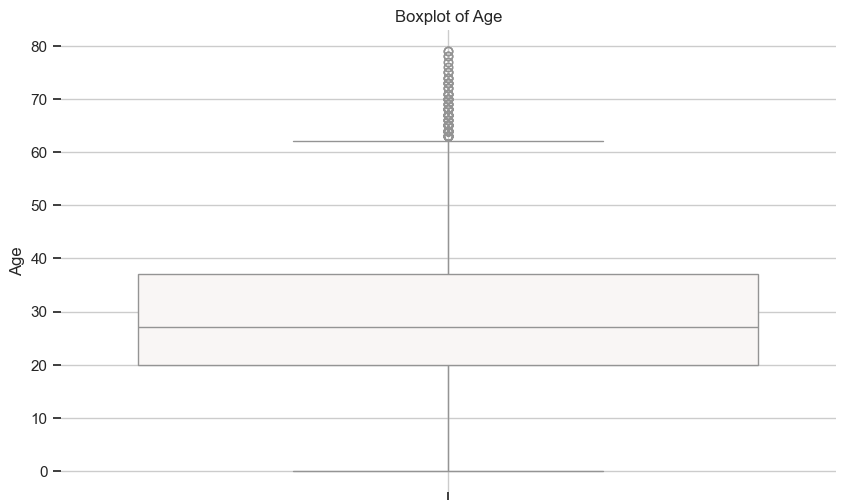

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data_column2 = data_train['Age']


sns.set_theme(style="ticks")


plt.figure(figsize=(10, 6))


sns.boxplot(y=data_column2, palette="vlag")


plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.grid(True)
sns.despine(trim=True, left=True)

plt.show()


In [84]:
data_train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


C:\Users\rigan\AppData\Local\Temp\ipykernel_3296\1520981628.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y=df.columns[0], data=df, palette='Blues_d')


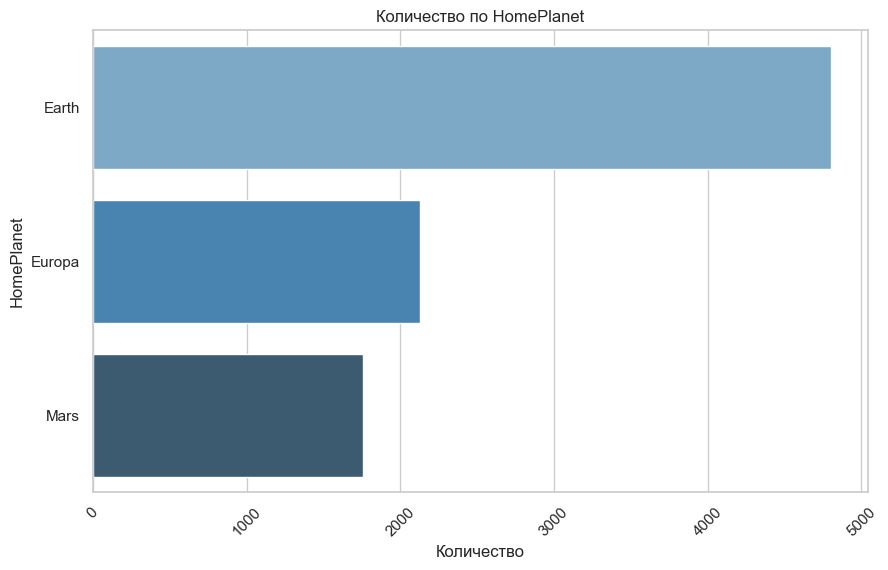

C:\Users\rigan\AppData\Local\Temp\ipykernel_3296\1520981628.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y=df.columns[0], data=df, palette='Blues_d')


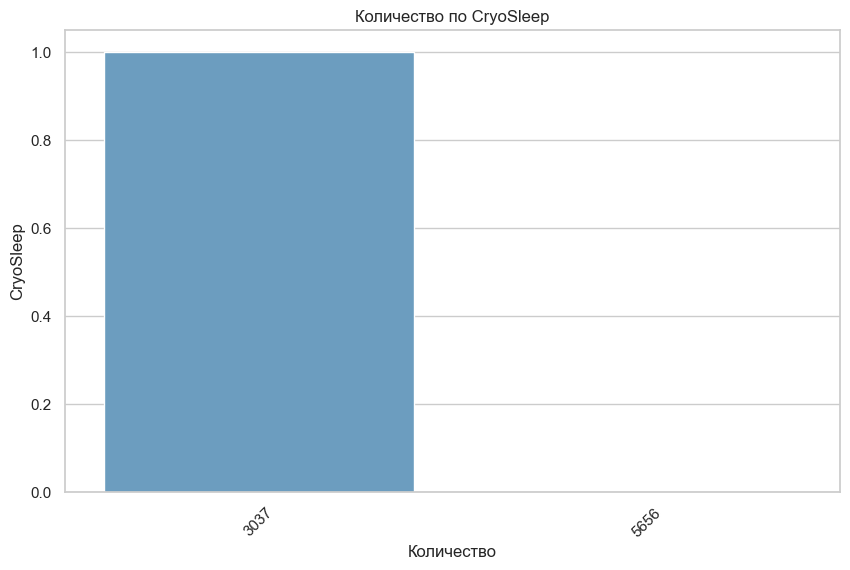

C:\Users\rigan\AppData\Local\Temp\ipykernel_3296\1520981628.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y=df.columns[0], data=df, palette='Blues_d')


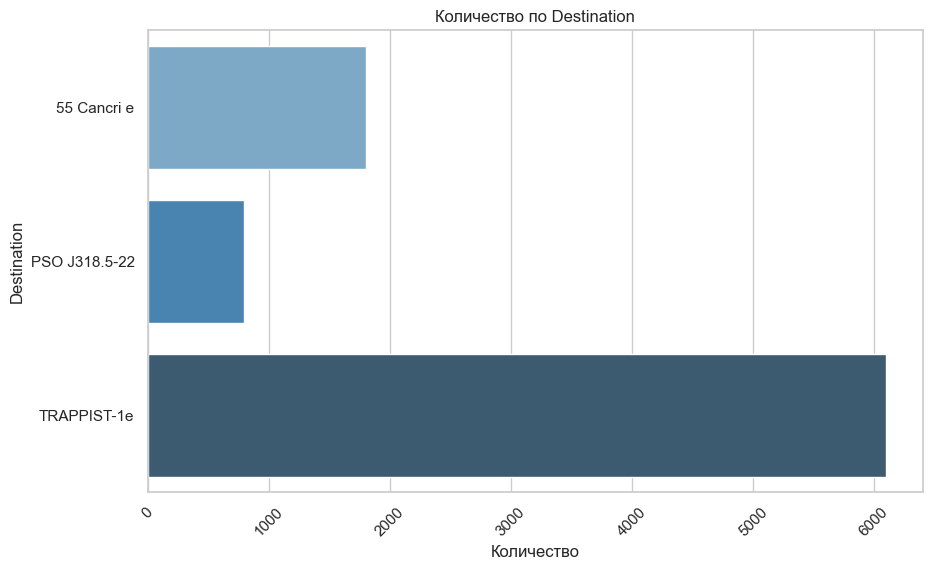

C:\Users\rigan\AppData\Local\Temp\ipykernel_3296\1520981628.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y=df.columns[0], data=df, palette='Blues_d')


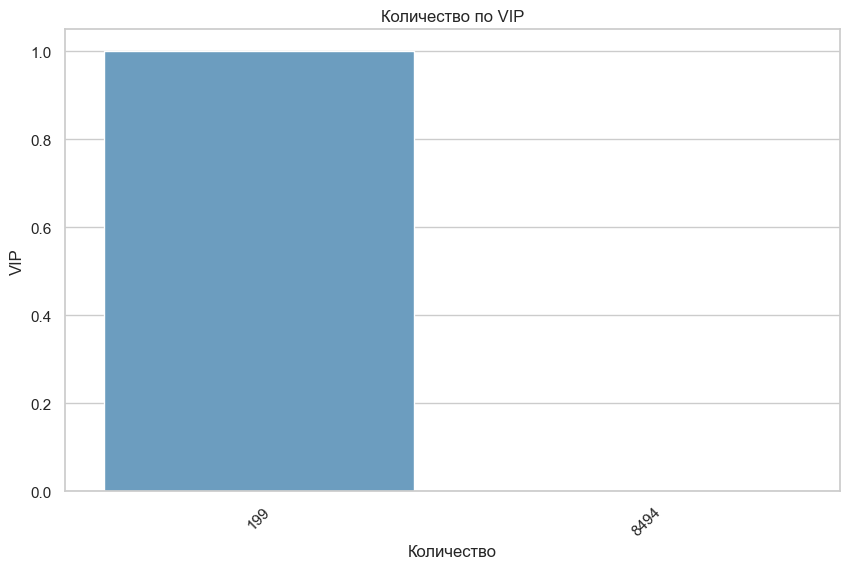

C:\Users\rigan\AppData\Local\Temp\ipykernel_3296\1520981628.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y=df.columns[0], data=df, palette='Blues_d')


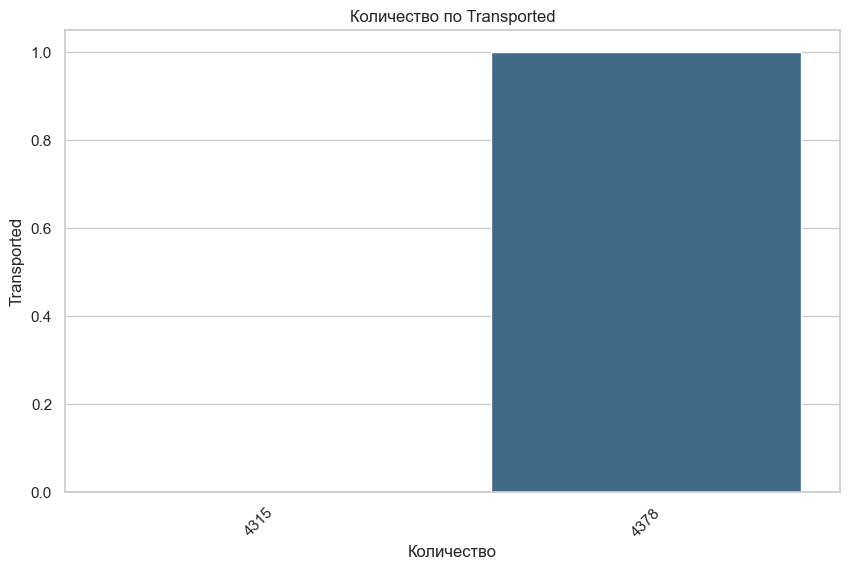

In [85]:
data_frames = {
    'HomePlanet': data_train.groupby('HomePlanet').size().reset_index(name='Count'),
    'CryoSleep': data_train.groupby('CryoSleep').size().reset_index(name='Count'),
    'Destination': data_train.groupby('Destination').size().reset_index(name='Count'),
    'VIP': data_train.groupby('VIP').size().reset_index(name='Count'),
    'Transported': data_train.groupby('Transported').size().reset_index(name='Count')
}


sns.set(style="whitegrid")

# Построение графиков для каждого агрегированного DataFrame
for title, df in data_frames.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Count', y=df.columns[0], data=df, palette='Blues_d')
    plt.title(f'Количество по {title}')
    plt.xlabel('Количество')
    plt.ylabel(title)
    plt.xticks(rotation=45)
    plt.show()


In [86]:
data_train['Transported'] = data_train['Transported'].astype(int)
data_train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,0
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,0
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,1
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,0


In [96]:
data_test = pd.read_csv(r"C:\A_B_tests\Titanic\test.csv")
data_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [97]:
data_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [98]:
import pandas as pd



columns_to_fill_mode = ['Destination', 'HomePlanet', 'CryoSleep', 'VIP']

columns_to_fill_mean = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
def clean_data(data_mode, data_mean):
    for col in columns_to_fill_mode:
        mode_value = data_test[col].mode()[0]  
        data_test[col] = data_test[col].fillna(mode_value) 


    for col in columns_to_fill_mean:
        data_test[col] = data_test[col].fillna(mean_value) 
clean_data(columns_to_fill_mode, columns_to_fill_mean)
data_test.isnull().sum()

C:\Users\rigan\AppData\Local\Temp\ipykernel_3296\4080095081.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test[col] = data_test[col].fillna(mode_value)  # Заполняем NaN модой


PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
dtype: int64

In [99]:
data_test = data_test.drop(['Cabin', 'Name'], axis=1)
data_id = data_test['PassengerId']
data_test = data_test.drop(['PassengerId'], axis=1)
data_test.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [126]:
from catboost import CatBoostClassifier

# Подготовка данных
x_param = data_train[['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
y = data_train['Transported']
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

model = CatBoostClassifier(
    iterations=1000,               
    learning_rate=0.01,            
    depth=10,                      
    l2_leaf_reg=10,               
    bagging_temperature=5,          
    leaf_estimation_method='Gradient', 
    used_ram_limit='10gb',        
    random_seed=42,               
    early_stopping_rounds=50,     
    eval_metric='F1',           
    verbose=100                   
)

# Обучение модели
model.fit(x_param, y, cat_features=cat_features)


preds = model.predict(data_test)
preds = preds.astype(bool)
print(preds)

0:	learn: 0.7970682	total: 158ms	remaining: 2m 38s
100:	learn: 0.8036652	total: 14.6s	remaining: 2m 9s
200:	learn: 0.8110027	total: 29s	remaining: 1m 55s
300:	learn: 0.8134394	total: 43s	remaining: 1m 39s
400:	learn: 0.8167181	total: 57.9s	remaining: 1m 26s
500:	learn: 0.8205581	total: 1m 10s	remaining: 1m 10s
600:	learn: 0.8227248	total: 1m 23s	remaining: 55.7s
700:	learn: 0.8260102	total: 1m 36s	remaining: 41.2s
800:	learn: 0.8293546	total: 1m 49s	remaining: 27.2s
900:	learn: 0.8319151	total: 2m 4s	remaining: 13.7s
999:	learn: 0.8355270	total: 2m 18s	remaining: 0us
[ True False  True ...  True  True  True]
